<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:
1. Proses algoritma KNN adalah mencari nilai k untuk menentukan jumlah tetangga terdekat dari data baru. Selanjutnya dari jumlah tersebut akan dilakukan voting manakah jumlah terbanyak dari kategori yang dicari. Data baru tersebut akan diklasifikasikan sesuai dengan kategori jumlah terbanyak tersebut
2. Hasil KNN akan buruk jika ada data pecilan/outlier dan jika nilai K = genap dan jumlah tetangga adalah sama, maka KNN akan bingung menentukan klasifikasi

---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
def train_model(k,w):
    model_knn = KNeighborsClassifier(n_neighbors=k, weights=w)
    model_knn.fit(X_train, y_train)
    model_knn.predict(X_test)
    return model_knn.score(X_test, y_test)

In [17]:
list_uniform = []
list_distance = []

In [18]:
for k in range(2,21,1):
    list_uniform.append(train_model(k,'uniform'))
    list_distance.append(train_model(k,'distance'))

In [19]:
list_uniform

[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

In [20]:
list_distance

[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

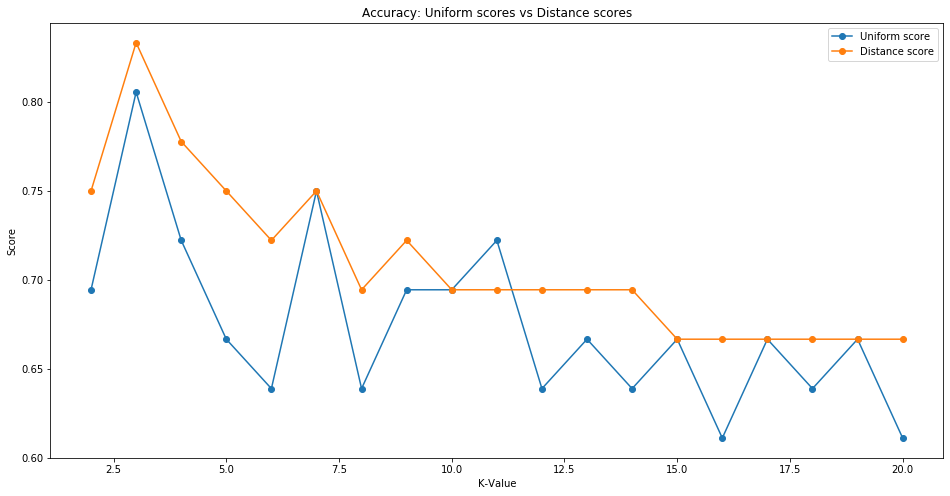

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))

k = range(2,21,1)
ax.plot(k, list_uniform, marker='o', label='Uniform score')
ax.plot(k, list_distance, marker='o', label='Distance score')
ax.set_xlabel('K-Value')
ax.set_ylabel('Score')
ax.set_title('Accuracy: Uniform scores vs Distance scores')
plt.legend()
plt.show()

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [32]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#To retrieve the intercept:
print('parameter intercept: ', regressor.intercept_)

#For retrieving the slope:
print('parameter koefesien: ',regressor.coef_)

parameter intercept  0.5000000016247412
parameter koefesien  [ 1.5 -5.   9.  10. ]
